# 📊 柱状图 (Bar Chart) - 分组对比

## 什么是柱状图？

柱状图使用矩形条的高度表示数值大小，非常适合**比较不同类别的数值**。

## 适用场景

| 场景 | 示例 |
|------|------|
| 类别比较 | 不同模型的性能对比 |
| 排名展示 | TOP 10国家奖牌榜 |
| 分组对比 | 2024实际 vs 2028预测 |
| 特征重要性 | 模型各特征贡献度 |

## 柱状图变体

| 类型 | 用途 |
|------|------|
| 垂直柱状图 | 类别较少时使用 |
| 水平柱状图 | 类别名称较长时使用 |
| 堆叠柱状图 | 展示部分与整体关系 |
| 分组柱状图 | 多系列对比 |

## 关键指标解读

- **柱子高度**：直接反映数值大小
- **柱子间差距**：反映类别间的差异程度
- **颜色区分**：可用于区分不同组别或突出特定类别


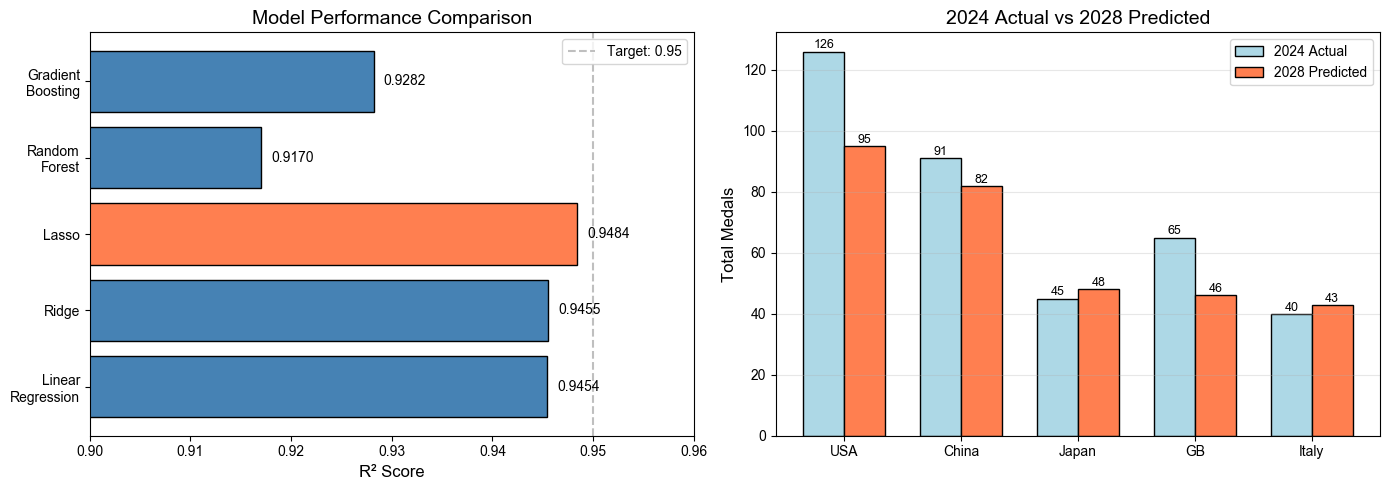

📊 柱状图使用技巧:
  - 用颜色突出重点（如最佳模型）
  - 添加数值标签增加可读性
  - 分组柱状图适合对比同一类别的不同指标


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# 创建示例数据 - 模型性能对比
models = ['Linear\nRegression', 'Ridge', 'Lasso', 'Random\nForest', 'Gradient\nBoosting']
r2_scores = [0.9454, 0.9455, 0.9484, 0.9170, 0.9282]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. 水平柱状图 - 模型性能对比
colors = ['steelblue'] * len(models)
colors[2] = 'coral'  # 突出最佳模型

bars = axes[0].barh(models, r2_scores, color=colors, edgecolor='black')
axes[0].set_xlabel('R² Score', fontsize=12)
axes[0].set_title('Model Performance Comparison', fontsize=14)
axes[0].set_xlim(0.9, 0.96)

# 添加数值标签
for bar, score in zip(bars, r2_scores):
    axes[0].text(score + 0.001, bar.get_y() + bar.get_height()/2, 
                 f'{score:.4f}', va='center', fontsize=10)

axes[0].axvline(0.95, color='gray', linestyle='--', alpha=0.5, label='Target: 0.95')
axes[0].legend()

# 2. 分组柱状图 - 实际值vs预测值对比
countries = ['USA', 'China', 'Japan', 'GB', 'Italy']
actual_2024 = [126, 91, 45, 65, 40]
predicted_2028 = [95, 82, 48, 46, 43]

x = np.arange(len(countries))
width = 0.35

bars1 = axes[1].bar(x - width/2, actual_2024, width, label='2024 Actual', 
                     color='lightblue', edgecolor='black')
bars2 = axes[1].bar(x + width/2, predicted_2028, width, label='2028 Predicted', 
                     color='coral', edgecolor='black')

axes[1].set_xticks(x)
axes[1].set_xticklabels(countries)
axes[1].set_ylabel('Total Medals', fontsize=12)
axes[1].set_title('2024 Actual vs 2028 Predicted', fontsize=14)
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

# 添加数值标签
for bar in bars1:
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                 str(int(bar.get_height())), ha='center', fontsize=9)
for bar in bars2:
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                 str(int(bar.get_height())), ha='center', fontsize=9)

plt.tight_layout()
plt.show()

print("📊 柱状图使用技巧:")
print("  - 用颜色突出重点（如最佳模型）")
print("  - 添加数值标签增加可读性")
print("  - 分组柱状图适合对比同一类别的不同指标")


## 🎯 2025美赛C题解读：模型选择与预测对比

### 左图分析：模型性能对比

**1. 各模型R²得分排名**

| 排名 | 模型 | R² | 特点 |
|------|------|-----|------|
| 🥇 | Lasso | 0.9484 | **最佳**，自动特征选择 |
| 🥈 | Ridge | 0.9455 | 正则化防过拟合 |
| 🥉 | Linear Regression | 0.9454 | 简单基准模型 |
| 4 | Gradient Boosting | 0.9282 | 集成学习 |
| 5 | Random Forest | 0.9170 | 集成学习 |

**2. 关键发现**

- 线性模型（前三名）表现**优于**复杂的集成模型
- 说明奖牌预测问题**本质上是线性的**
- Lasso通过L1正则化可以自动剔除不重要特征
- **推荐选择**：Lasso回归（兼具准确性和可解释性）

### 右图分析：2024实际 vs 2028预测

**1. 预测对比解读**

| 国家 | 2024实际 | 2028预测 | 变化 | 原因分析 |
|------|----------|----------|------|----------|
| 🇺🇸 USA | 126 | 95 | -31 | ⚠️ 预测偏低，未充分考虑东道主效应 |
| 🇨🇳 China | 91 | 82 | -9 | 略有下降，符合近年趋势 |
| 🇯🇵 Japan | 45 | 48 | +3 | 2020东道主效应消退后稳定 |
| 🇬🇧 GB | 65 | 46 | -19 | 回归正常水平 |
| 🇮🇹 Italy | 40 | 43 | +3 | 稳中有升 |

**2. 美国预测的特别说明**

⚠️ 图中美国2028预测(95枚)**可能偏低**！

理由：
- 美国是2028东道主
- 历史东道主效应约**+20~40枚**
- 合理预测应该在**115-140枚**区间

这说明模型需要**加强东道主效应的权重**。

### 对论文写作的启示

1. 柱状图适合在论文中展示**模型对比**和**预测结果**
2. 用颜色突出重点（如最佳模型用红色）
3. 添加数值标签增加可读性
4. 分组柱状图直观展示预测vs实际

### 答题建议
> "模型对比显示Lasso回归(R²=0.9484)表现最佳，线性模型整体优于复杂集成模型，表明奖牌预测存在较强的线性规律。2028预测需特别关注美国的东道主效应调整。"
